# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Marsello-or/dataset_klasifikasi_dicoding/refs/heads/main/clustered_data.csv")

In [3]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
gender             0
cluster            0
dtype: int64


In [4]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df.head())

    age  NumberOffriends  basketball  football  soccer  softball  volleyball  \
0  17.0             49.0         0.0       0.0     1.0       0.0         0.0   
1  18.0             41.0         0.0       0.0     0.0       0.0         0.0   
2  17.0              1.0         0.0       0.0     0.0       0.0         0.0   
3  18.0             32.0         0.0       5.0     0.0       0.0         0.0   
4  19.0             18.0         0.0       0.0     0.0       0.0         0.0   

   swimming  cheerleading  baseball  ...  shopping  clothes  hollister  \
0       1.0           0.0       0.0  ...       0.0      0.0        0.0   
1       0.0           0.0       1.0  ...       0.0      0.0        0.0   
2       1.0           0.0       0.0  ...       0.0      3.0        0.0   
3       0.0           0.0       0.0  ...       0.0      0.0        0.0   
4       0.0           0.0       0.0  ...       0.0      1.0        0.0   

   abercrombie           die  death  drunk  drugs  gender  cluster  
0    

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('cluster')

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df[numeric_columns]
y = df['cluster']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(9633, 39), y_train=(9633,)
Test set shape: X_test=(2409, 39), y_test=(2409,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })


summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.894977   0.890495  0.998527  0.941422
1            Decision Tree (DT)  0.899543   0.932915  0.949411  0.941091
2            Random Forest (RF)  0.941054   0.938020  0.996071  0.966174
3  Support Vector Machine (SVM)  0.980905   0.983010  0.994597  0.988770
4              Naive Bayes (NB)  0.908261   0.979398  0.910609  0.943752


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_macro')
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1_macro')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1_macro')
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [9]:
results_tuned = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn_best, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt_best, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf_best, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm_best, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

summary_df_tuned = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
rows_tuned = []

for model_name, metrics in results_tuned.items():
    rows_tuned.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df_tuned = pd.DataFrame(rows_tuned)
print("\nTuned Model Performance:")
summary_df_tuned


Tuned Model Performance:


,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.901619,0.896780,0.998527,0.944922
1,Decision Tree (DT),0.896222,0.929327,0.949411,0.939261
2,Random Forest (RF),0.950602,0.950635,0.993124,0.971415
3,Support Vector Machine (SVM),0.992528,0.993157,0.998035,0.995590
4,Naive Bayes (NB),0.908261,0.979398,0.910609,0.943752


## Hasil Model yang digunakan
Berdasarkan hasil analisis evaluasi metriks dari model yang digunakan, maka ditentukan 2 model terbaik yang didapatkan adalah SVM dna juga Random Forest

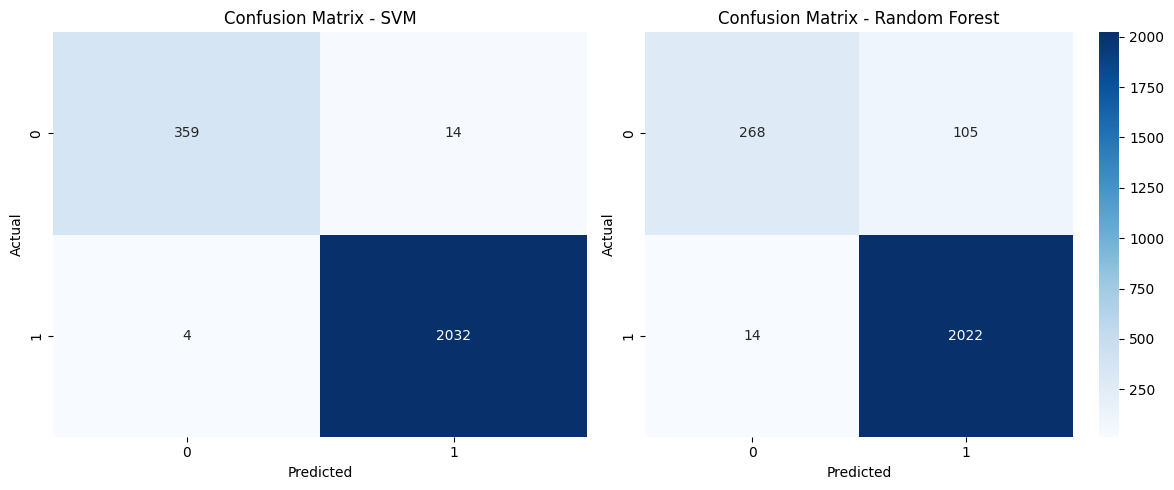

In [10]:
y_pred_svm = svm_best.predict(X_test)

y_pred_rf = rf_best.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

### Kesimpulan
Terlihat lagi bahwa model yang terbaik adalah SVM karena pada diagram missed tebak atau salah tebaknya lebih sedikit apabila dibandingkan dengan metode RF yang masih memiliki tingkat error atau salah tebak yang lebih tinggi.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Analisis Summary Tuned Model Performance
1. Setelah mengalami tunin hyperparameter model SVM dan Random Forest mengalami peningkatan, masing-masing mendapatkan peningkatan menjadi 99,25% dan juga 94,72% secara berurutan. Selain itu Model KNN, Decision Tree, dan juga Naive Bayer mengalami sedikit perubahan saja.
2. KNN memiliki akurasi yang lebih rendah dibandingkan dengan model lainnya, meskipun tingkat recall yang lebih tinggi, menandakan model yang kurang presisi.
3. Decision tree cenderung lebih mudah overditting, tapi masih memiliki performa yang layak.
4. SVM memiliki performa yang baik secara keseluruhan dengan keseimbangan antara presisi dan recall.



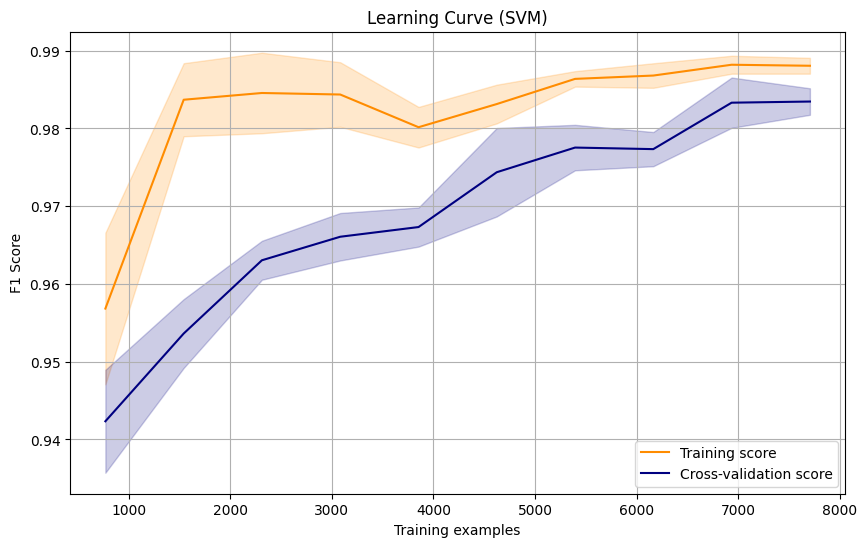

In [11]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    svm_best, X_train, y_train, cv=5, scoring='f1_macro', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
)
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
)

plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.title("Learning Curve (SVM)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### Analisis grafik learning curve


Berdasarkan analisis yang dibuat terlihat bahwa grafik learning curve yang dihasilkan menunjukkan keseluruhan hasil yang baik.
1. Overfitting
Tidak ada indikasi overfitting karena gap yang kecil antara grafik training dan cross validation score
2. Underfitting
TIdak ada indikasi underfitting karena nilai training scorenya yang masih tinggi dan terus meingkat
3. Generalisasi
Karena kedua grafik saling bergerak mendekati satu sama lain, maka terbukti jika model dapat mempelajari polanya bukan hanya mengingat pola
4. Perfoma yang meningkat seiring bertambahnya data